1000
m = 1.179895412226227 +- 0.13627155132645613 V
n = 4.408371703434248 +- 0.6974164883286428 ms
Chi2       = 0.6458567499986791
dof        = 998
Chi2_red   = 0.0006471510521028849


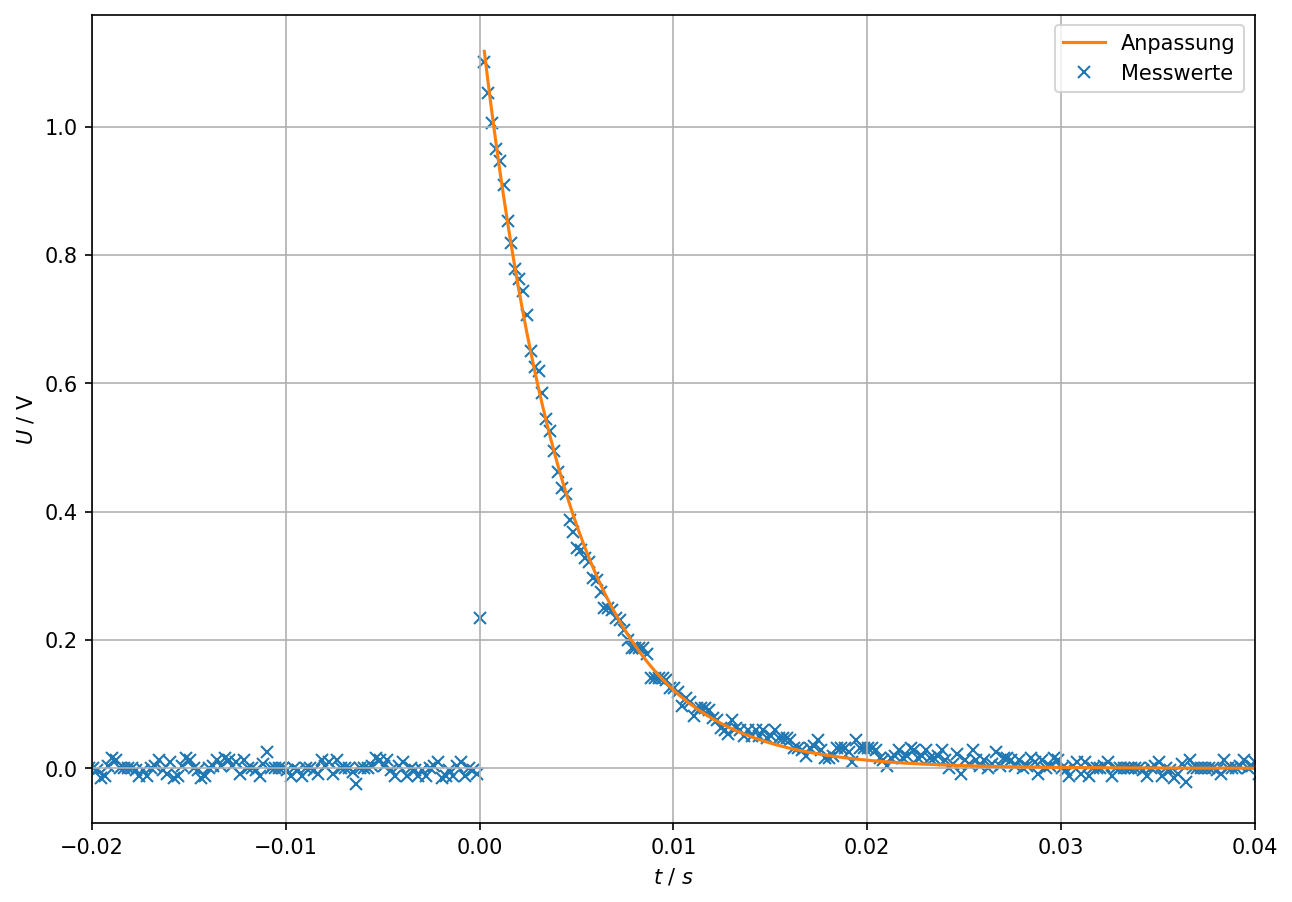

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
from scipy.optimize import curve_fit


figure(figsize=(10,7), dpi=150)

tau=np.loadtxt('../data/print_002.csv',skiprows=2,delimiter=',',usecols=0)
U=np.loadtxt('../data/print_002.csv',skiprows=2,delimiter=',', usecols=1)

dtau=0.01*abs(tau)
dU=0.02*abs(U)
#dtau = [0.1]*len(tau)
#dU = [0.3]*len(U)
print(len(tau))
tauk=tau[481:]
Uk=U[481:]

#dtauk=[0.1]*len(tauk)
#dUk=[0.3]*len(Uk)
dtauk=[0.1]*len(tauk)
dUk=[0.3]*len(Uk)

def f(x,m,n):
    return m*(np.exp(-x/n))

x=[18,0.0038]

popt, pcov=curve_fit(f,tauk,Uk,p0=x,sigma=dUk,absolute_sigma=True)
perr=np.sqrt(np.diag(pcov))

print("m =", popt[0], "+-", perr[0], "V")
print("n =", popt[1]*10**3, "+-", perr[1]*10**3, "ms")
#print('a =', popt[2], "+-", perr[2])
# compute chi-square
chi2 = np.sum(((Uk - f(tauk, *popt)) / dUk)**2)

# degrees of freedom = number of data points - number of parameters
dof = len(tau) - len(popt)

chi2_red = chi2 / dof

print("Chi2       =", chi2)
print("dof        =", dof)
print("Chi2_red   =", chi2_red)
plt.xlim(-0.02, 0.04)
plt.errorbar(tau, U, fmt='x',capsize=2, zorder=1, label='Messwerte')
plt.plot(tauk,f(tauk,*popt), zorder=2, label='Anpassung')
plt.grid(which='minor')
plt.grid(which='major')
plt.xlabel(r'$t$ / $s$')
plt.ylabel(r'$U$ / V')
plt.tight_layout
plt.legend()
plt.savefig('../plots/eff_Relaxationszeit.pdf')
plt.show()
#plt.plot(tauk,f(tauk,18,0.0038))
